### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

### Set-up

In [2]:
# we will read the dataset that we created in the previous exercise
df = pd.read_csv("DSDPartners_Data.csv", encoding='ISO-8859-1')
df.head()

,CustStorItemTriadID,BaseorderID,Createdate,RecDeliveryDate,CategoryID,OaMasterDistributorID,ConversionFactor,InventoryChange,ActualScans,ForecastedScans,...,twoagoqty_avg,OGvsModifiedOG,lastdeliv_create_overlap,daily_invntchange,avg_invent_change,current_vs_avg_invnratio,days_last_delivered,forecasted_origprop_ratio,trup_origprop_ratio,actual_origprop_ratio
0,13761530,1867926,2020-05-01,2020-05-07,1,5,0.75,12,0,13,...,0.620000,1,-3.0,3.000000,2.940860,1.020110,4,1.444444,0.000000,0.0
1,13766672,1862453,2020-05-01,2020-05-06,1,5,0.75,4,0,4,...,0.000000,1,-1.0,0.666667,0.735394,0.906543,6,0.000000,0.000000,0.0
2,13771739,1867825,2020-05-01,2020-05-07,1,5,0.75,37,0,43,...,1.049231,1,-3.0,9.250000,9.110215,1.015344,4,0.895833,0.041667,0.0
3,13772017,1860527,2020-05-01,2020-05-05,1,5,0.75,9,0,18,...,1.435185,1,0.0,3.000000,2.317204,1.294664,3,1.125000,0.000000,0.0
4,13774001,1863282,2020-05-01,2020-05-05,1,5,0.75,0,0,0,...,0.000000,0,1.0,0.000000,0.077942,0.000000,10,0.000000,0.000000,0.0


In [3]:
#also try Operator Adjustments as potential target
target = 'PropOrderQty'

## Linear Regression

### Set-up X and y

In [4]:
y = np.asarray(df[target])
#y = np.reshape(y,(y.shape[0],1))
X = df.drop(['CustStorItemTriadID','BaseorderID','Createdate','ModelUsed','RecDeliveryDate',
             'ConversionFactor','Previous2DelDate','MaxScanDate','MaxShipDate','Reviewed','IncInAnom',
            'PrevDeliveryDate'], axis = 1).drop(target, axis=1).fillna(0)
#df.isna().sum()

In [5]:
X.head()

,CategoryID,OaMasterDistributorID,InventoryChange,ActualScans,ForecastedScans,WeightData,BaseOrder,SlowMoving,TooBig,TrueUpAdjQty,...,twoagoqty_avg,OGvsModifiedOG,lastdeliv_create_overlap,daily_invntchange,avg_invent_change,current_vs_avg_invnratio,days_last_delivered,forecasted_origprop_ratio,trup_origprop_ratio,actual_origprop_ratio
0,1,5,12,0,13,1,8,0,0,0,...,0.620000,1,-3.0,3.000000,2.940860,1.020110,4,1.444444,0.000000,0.0
1,1,5,4,0,4,0,0,0,0,0,...,0.000000,1,-1.0,0.666667,0.735394,0.906543,6,0.000000,0.000000,0.0
2,1,5,37,0,43,1,45,0,0,2,...,1.049231,1,-3.0,9.250000,9.110215,1.015344,4,0.895833,0.041667,0.0
3,1,5,9,0,18,0,16,0,0,0,...,1.435185,1,0.0,3.000000,2.317204,1.294664,3,1.125000,0.000000,0.0
4,1,5,0,0,0,-2,0,0,0,0,...,0.000000,0,1.0,0.000000,0.077942,0.000000,10,0.000000,0.000000,0.0


In [6]:
#Establish training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

len(X_train), len(X_test), len(y_test), len(y_train)

(247801, 247801, 247801, 247801)

In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [8]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.71
Mean squared error = 2.28
Median absolute error = 0.19
Explain variance score = 0.95
R2 score = 0.95


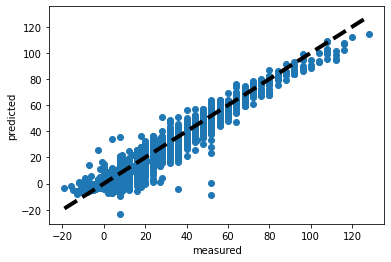

In [9]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

Feature: 0, Score: 0.00591
Feature: 1, Score: 0.11521
Feature: 2, Score: 0.00014
Feature: 3, Score: 0.19162
Feature: 4, Score: 0.17050
Feature: 5, Score: 0.56338
Feature: 6, Score: 0.69091
Feature: 7, Score: 5.97624
Feature: 8, Score: -2.05624
Feature: 9, Score: 0.55653
Feature: 10, Score: 0.02746
Feature: 11, Score: -0.06344
Feature: 12, Score: -0.00204
Feature: 13, Score: -0.00143
Feature: 14, Score: -0.09032
Feature: 15, Score: 0.05485
Feature: 16, Score: 0.00671
Feature: 17, Score: 0.02799
Feature: 18, Score: 0.02727
Feature: 19, Score: -0.21249
Feature: 20, Score: -0.23489
Feature: 21, Score: 0.13295
Feature: 22, Score: -0.09208
Feature: 23, Score: -0.32303
Feature: 24, Score: 0.41756
Feature: 25, Score: 0.00436
Feature: 26, Score: 0.00320
Feature: 27, Score: -0.01223
Feature: 28, Score: 0.80080
Feature: 29, Score: -0.00173
Feature: 30, Score: 0.05445
Feature: 31, Score: 0.36919
Feature: 32, Score: -0.00803
Feature: 33, Score: 0.00085
Feature: 34, Score: 0.61534
Feature: 35, Score

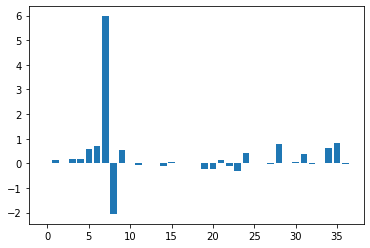

In [10]:

#Determine which features are most important to the model
import matplotlib.pyplot as pyplot
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [11]:
X.columns

Index(['CategoryID', 'OaMasterDistributorID', 'InventoryChange', 'ActualScans',
       'ForecastedScans', 'WeightData', 'BaseOrder', 'SlowMoving', 'TooBig',
       'TrueUpAdjQty', 'TUAIssue', 'OriginalPropOrderQty', 'ConversionUnits',
       'MaxDeliveredQty', 'ConversionResidual', 'TwoOrderAgo',
       'QtyShippedTwoOrderAgo', 'OneOrderAgo', 'lead_time', 'new_client',
       'skipped_ship', 'never_shipped', 'lastorder_maxorder',
       'twoago_order_maxorder', 'order_maxorder', 'originalqty_avg',
       'lastqty_avg', 'twoagoqty_avg', 'OGvsModifiedOG',
       'lastdeliv_create_overlap', 'daily_invntchange', 'avg_invent_change',
       'current_vs_avg_invnratio', 'days_last_delivered',
       'forecasted_origprop_ratio', 'trup_origprop_ratio',
       'actual_origprop_ratio'],
      dtype='object')

## Neural Networks

In [12]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

In [15]:
# Create model

model = Sequential()
model.add(Dense(X.shape[1], activation="relu", input_dim=X.shape[1]))
model.add(Dense(X.shape[1]*.75, activation="relu"))
model.add(Dense(1))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)


Epoch 1/100
24781/24781 - 18s - loss: 2.8811 - val_loss: 2.0104
Epoch 2/100
24781/24781 - 17s - loss: 2.0066 - val_loss: 1.7931
Epoch 3/100
24781/24781 - 17s - loss: 1.8749 - val_loss: 1.7449
Epoch 4/100
24781/24781 - 17s - loss: 1.8179 - val_loss: 1.7970
Epoch 5/100
24781/24781 - 17s - loss: 1.7714 - val_loss: 1.7237
Epoch 6/100
24781/24781 - 17s - loss: 1.7614 - val_loss: 1.8228
Epoch 7/100
24781/24781 - 17s - loss: 1.7376 - val_loss: 1.6750
Epoch 8/100
24781/24781 - 17s - loss: 1.7270 - val_loss: 1.7174
Epoch 9/100
24781/24781 - 17s - loss: 1.7116 - val_loss: 1.7660
Epoch 10/100
24781/24781 - 17s - loss: 1.7067 - val_loss: 1.6687
Epoch 11/100
24781/24781 - 17s - loss: 1.6982 - val_loss: 1.6550
Epoch 12/100
24781/24781 - 17s - loss: 1.6929 - val_loss: 1.6923
Epoch 13/100
24781/24781 - 17s - loss: 1.6767 - val_loss: 1.6891
Epoch 14/100
24781/24781 - 17s - loss: 1.6700 - val_loss: 1.8201
Epoch 15/100
24781/24781 - 17s - loss: 1.6677 - val_loss: 1.6671
Epoch 16/100
24781/24781 - 18s - l

In [16]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, PredValSet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, PredValSet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, PredValSet), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, PredValSet), 2)) 
print("R2 score =", round(sm.r2_score(y_test, PredValSet), 3))

Mean absolute error = 0.43
Mean squared error = 1.62
Median absolute error = 0.07
Explain variance score = 0.96
R2 score = 0.962


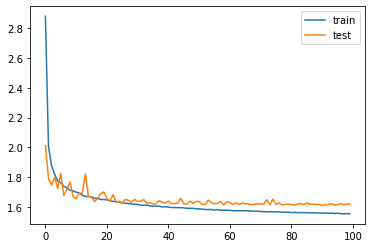

In [17]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [18]:
#Neural Network Model Accuracy
r_squared = r2_score(y_test,PredValSet)
#add RMSE,MSE, MAE

In [19]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [20]:
r_squared, adjusted_r_squared

(0.9618329784772767, 0.9618301288356635)

In [21]:
#Use the below code to see what percent where our predictions fall within 3, 4 or 5 off from actual
#As of Sunday night 98.6, 98.0 and 96.8 percent of predictions are +- 3,4 or 5 of actual.
#Biggest improvement is that the model gets it exactly right 83% of the time with new features, compared to 70% prior.
y_test_vals =np.reshape(y_test,(y_test.shape[0],))
Preds =  np.reshape(PredValSet,(PredValSet.shape[0],))
compare = pd.DataFrame(np.array([y_test_vals, Preds]))

                                 
compare = np.transpose(compare)
compare.to_csv(r'compare.csv', index = False)

In [70]:
## Determine variable importance in neural network model
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = Sequential()
    model.add(Dense(X.shape[1], activation="relu", input_dim=X.shape[1]))
    model.add(Dense(36, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200)) 
    return model

my_model = KerasRegressor(build_fn=base_model)    
my_model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

perm = PermutationImportance(my_model, random_state=1).fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Epoch 1/100
7744/7744 [==============================] - 8s 966us/step - loss: 4.2685 - val_loss: 3.1759
Epoch 2/100
7744/7744 [==============================] - 7s 853us/step - loss: 2.1700 - val_loss: 1.9181
Epoch 3/100
7744/7744 [==============================] - 7s 966us/step - loss: 1.9178 - val_loss: 1.7796
Epoch 4/100
7744/7744 [==============================] - 7s 850us/step - loss: 1.8525 - val_loss: 1.7602
Epoch 5/100
7744/7744 [==============================] - 7s 858us/step - loss: 1.7752 - val_loss: 1.6965
Epoch 6/100
7744/7744 [==============================] - 7s 862us/step - loss: 1.7296 - val_loss: 1.8170
Epoch 7/100
7744/7744 [==============================] - 7s 854us/step - loss: 1.7314 - val_loss: 1.7008
Epoch 8/100
7744/7744 [==============================] - 6s 838us/step - loss: 1.7083 - val_loss: 1.7430
Epoch 9/100
7744/7744 [==============================] - 6s 832us/step - loss: 1.7942 - val_loss: 1.6691
Epoch 10/100
7744/7744 [==============================]

7744/7744 [==============================] - 3s 358us/step - loss: 1.4693


Weight,Feature
10.5854 ± 0.0536,OriginalPropOrderQty
5.9685 ± 0.0639,BaseOrder
4.7832 ± 0.0416,ForecastedScans
2.0039 ± 0.0782,TrueUpAdjQty
1.1560 ± 0.0153,ConversionUnits
1.0509 ± 0.0338,SlowMoving
0.6119 ± 0.0333,days_last_delivered
0.4792 ± 0.0210,MaxDeliveredQty
0.4457 ± 0.0051,WeightData
0.3273 ± 0.0074,InventoryChange


## Gradient Boost Regressor

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=314)

param_grid = {'n_estimators': [100,300,500,1000], 
              'learning_rate': [.025, 0.05, .25, 0.5],
              'criterion': [‘friedman_mse’, ‘mse’, ‘mae’],
             'loss': [‘ls’, ‘lad’, ‘huber’, ‘quantile’]}
gbm_rs = RandomizedSearchCV(gbm, param_grid, cv=3, n_iter=100, n_jobs=-1, random_state=314)

gbm.fit(X_train, y_train)
print ('Best GBM Parameters:', gbm_rs.best_params_)

#gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]
#gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]

gbm_scores_train = gbm_rs.predict(X_train)
gbm_scores_test = gbm_rs.predict(X_test)

#gbm_fpr_train, gbm_tpr_train, _ = roc_curve(y_train, gbm_scores_train)
#gbm_fpr_test, gbm_tpr_test, _ = roc_curve(y_test, gbm_scores_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(n_estimators=100, learning_rate=.025,criterion='friedman_mse')

param_grid = {'n_estimators': [100,300,500,1000], 
              'learning_rate': [.025,.05,.25,.5],
              'criterion': ['friedman_mse','mse','mae'],
              'loss': ['ls','lad','huber','quantile']}

gb_rs = RandomizedSearchCV(gbrt,param_grid,n_jobs=-1,random_state=314)

gb_rs.fit(X_train, y_train)


#y_pred=gbrt.predict(X_test)
#gbm_scores_test = gbm_rs.predict(X_test)

/Users/liz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(n_estimators=100, learning_rate=.1,criterion='friedman_mse',loss='ls')

gb_rs.fit(X_train, y_train)


#y_pred=gbrt.predict(X_test)
#gbm_scores_test = gbm_rs.predict(X_test)

KeyboardInterrupt: 

In [ ]:
y_pred=gbrt.predict(X_test)
#gb_rs.best_params_

In [ ]:
#Decision Tree Model R2
r2_score(y_test,y_pred)

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 3))

#keras

In [267]:
# evaluate the model
scores = model.evaluate(X, y, verbose=0)
scores

1.9170284271240234

In [278]:
r2_score(y,predictions)

0.9594636951717443

# Optimization

In [ ]:
#best is batch size of 10 with 100 epics

import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def create_model():
    model = Sequential()
    model.add(Dense(42, activation="relu", input_dim=X.shape[1]))
    #model.add(Dense(36, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))
    return model

seed=314

model = KerasRegressor(build_fn=create_model, verbose=0)
batch_size = [10,100]
epochs = [10,100]


param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))